# Project Report

#### Team 1: Prathamesh Desai, Alisa Hartle

This notebook outlines the procedures in our machine learning project dedicated to predicting serious mental illness using the New York State Office of Mental Health patient survey data. 

Serious mental illness is a subset of mental illness. According to the [National Institute of Mental Health](https://www.nimh.nih.gov/health/statistics/mental-illness.shtml), “Serious mental illness (SMI) is defined as a mental, behavioral, or emotional disorder resulting in serious functional impairment, which substantially interferes with or limits one or more major life activities.” This includes conditions such as major depression, schizophrenia, and bipolar disorder. 

In New York State, its estimated [3.6%](https://www.rtor.org/directory/mental-health-new-york/) of its 19 million residents have a serious mental illness. But only 40.1% of people with serious mental illness receive treatment, and it’s believed those who are not in treatment are unaware of their condition. With 77% of people in treatment saying it helped, it seems overall treatment is beneficial to those who need it, and the biggest area of improvement is diagnosing people who may be unaware of their condition.

There are many consequences of not getting treatment for people with serious mental illness. Not treating a serious mental illness can increase the likelihood of homelessness. It’s also estimated that approximately one quarter of persons with serious mental illness are victimized in some way each year. Persons with mental illness can also be a harm to others: they are responsible for [29% of familial homicides](https://www.treatmentadvocacycenter.org/key-issues/consequences-of-non-treatment). One of the biggest risks is suicide: up to [50% of persons](https://www.treatmentadvocacycenter.org/key-issues/consequences-of-non-treatment) with bipolar disorder or schizophrenia attempt suicide at some point in their lives. Finally, persons with untreated SMI often end up in suboptimal places for treatment such as prison--its estimated 20% of the prison population has a serious mental illness, and that this costs [New York State](https://www.bhecon.org/wp-content/uploads/2018/01/NY-Chartbook-2018_FINAL.pdf) over $500 million annually.

We set out on this project hoping that our model can be used by doctors and healthcare practitioners to make initial diagnosis. Mental health issues are hard to diagnose and people often conceal their issues due to stigma associated with it. This can result in not only poor mental health outcomes, but also unfortunate life outcomes if not identified early on.



## Loading the Dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_seq_items = 2000
pd.set_option('display.max_columns', 10000)

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Reading and Exploring the Data

In [2]:

nys_omh = pd.read_csv('patient-characteristics-survey-pcs-2015.csv')

In [3]:
nys_omh.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Smokes,Received Smoking Medication,Received Smoking Counseling,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2015,INPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,113
1,2015,INPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,INSTITUTIONAL SETTING,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,YES,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,YES,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,NO,NO,YES,NO,UNKNOWN,NO,NO,UNKNOWN,YES,113
2,2015,INPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,107
3,2015,INPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ASIAN AND PACIFIC ISLAND,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,YES,888
4,2015,INPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,YES,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NOT MI - ORGANIC MENTAL DISORDER,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,NO,117


In [4]:
data = nys_omh.copy()

In [5]:
type(nys_omh)

pandas.core.frame.DataFrame

## Feature Engineering

While our dataset is clean, it featured many binary and categorical attributes. This section outlines the necessary steps we took to replace some YES/NO columns with binary values and transform others into dummy variables.

### All Initial Column Names

In [6]:
cols = [i for i in nys_omh.columns]
cols

['Survey Year',
 'Program Category',
 'Region Served',
 'Age Group',
 'Sex',
 'Transgender',
 'Sexual Orientation',
 'Hispanic Ethnicity',
 'Race',
 'Living Situation',
 'Household Composition',
 'Preferred Language',
 'Veteran Status',
 'Employment Status',
 'Number Of Hours Worked Each Week',
 'Education Status',
 'Special Education Services',
 'Mental Illness',
 'Intellectual Disability',
 'Autism Spectrum',
 'Other Developmental Disability',
 'Alcohol Related Disorder',
 'Drug Substance Disorder',
 'Mobility Impairment Disorder',
 'Hearing Visual Impairment',
 'Hyperlipidemia',
 'High Blood Pressure',
 'Diabetes',
 'Obesity',
 'Heart Attack',
 'Stroke',
 'Other Cardiac',
 'Pulmonary Asthma',
 'Alzheimer or Dementia',
 'Kidney Disease',
 'Liver Disease',
 'Endocrine Condition',
 'Neurological Condition',
 'Traumatic Brain Injury',
 'Joint Disease',
 'Cancer',
 'Other Chronic Med Condition',
 'No Chronic Med Condition',
 'Unknown Chronic Med Condition',
 'Smokes',
 'Received Smoking 

### Unknowns/Nulls

We realized fairly quickly that there were no null values in our dataset; instead the value was listed as UNKNOWN. To more effectively filter out incomplete data we recoded UNKNOWNs to nulls.

In [7]:
nys_omh.replace('UNKNOWN', np.nan, inplace=True)

In [8]:
nys_omh.dropna(inplace=True)

### Dropping Columns

There are several attributes in the dataset that would end up being highly correlated with serious mental illness by definition (such as Mental Illness, Diagnosis, etc.). Because our goal is to predict serious mental illness prior to treatment, these columns were removed from the dataset. Additional, we removed the uninformative columns for Survey Year (all patients were surveyed in the same week in October 2015) and Unknown Insurance Coverage. Finally, we removed program category as inpatient, residential, and outpatient treatment types may unintentionally predict Serious Mental Illness via reverse causality.

In [9]:
nys_omh.drop(columns=['Survey Year', 'Mental Illness', 'Principal Diagnosis Class', 
              'Additional Diagnosis Class', 'Unknown Insurance Coverage', 'Program Category'], inplace=True)

### Creating the LGBTQ+ Column

As the data show below, the incidence of specific categories for gay, bisexual, and transgender youth are somewhat limited. Due to the stigma, harrassment, and violence that often plague LGBTQ individuals we know members of this population may be more likely to be diagnosed with serious mental illness--and also often conceal their sexual or gender identity. To account for the limited representation, we decided to create a binary LGBTQ+ attribute.

In [10]:
nys_omh['Sexual Orientation'].value_counts()

STRAIGHT OR HETEROSEXUAL    42744
LESBIAN OR GAY               1679
CLIENT DID NOT ANSWER        1555
BISEXUAL                     1488
OTHER                         343
Name: Sexual Orientation, dtype: int64

In [11]:
nys_omh['Transgender'].value_counts()

NO, NOT TRANSGENDER     47216
YES, TRANSGENDER          385
CLIENT DIDN'T ANSWER      208
Name: Transgender, dtype: int64

In [12]:
# nys_omh['Transgender'] = nys_omh['Transgender'].map({'NO, NOT TRANSGENDER': 0, 'YES, TRANSGENDER': 1, 'CLIENT DIDN\'T ANSWER': np.nan})

In [13]:
nys_omh['LGBTQ+'] = nys_omh['Sexual Orientation']

This section shows how all of the values that were coded as 1 for the LGBTQ+ column. Because the number of rows in our dataset became so limited after removing all unknown values, we decided we didn't want to reduce our sample size further by eliminating 'CLIENT DIDN'T ANSWER.' We made the assumption that the lack of an answer was an answer, or possibly due to the person still figuring out their identity. Therefore, we coded all non-answers (less than 5% of people) as LGBTQ+ as well.

In [14]:
nys_omh.loc[(nys_omh['Sexual Orientation'] == 'LESBIAN OR GAY') | (nys_omh['Sexual Orientation'] == 'BISEXUAL') 
            | (nys_omh['Sexual Orientation'] == 'OTHER') | (nys_omh['Transgender'] == 'YES, TRANSGENDER')
            | (nys_omh['Sexual Orientation'] == 'CLIENT DID NOT ANSWER') | (nys_omh['Transgender'] == 'CLIENT DIDN\'T ANSWER')
            , 'LGBTQ+'] = 1

In [15]:
nys_omh['LGBTQ+'] = nys_omh['LGBTQ+'].replace('STRAIGHT OR HETEROSEXUAL', 0)

In [16]:
nys_omh['LGBTQ+'].value_counts()

0    42574
1     5235
Name: LGBTQ+, dtype: int64

Finally, we removed the original Sexual Orientation and Transgender columns.

In [17]:
nys_omh.drop(columns=['Sexual Orientation', 'Transgender'], inplace=True)

### Race and Ethnicity

In this section we recode Hispanic Ethnicity to be binary and remove records where race is unknown. 

In [18]:
nys_omh['Hispanic Ethnicity'] = nys_omh['Hispanic Ethnicity'].map({'NO, NOT HISPANIC/LATINO': 0, 'YES': 1})

In [19]:
nys_omh['Race'] = nys_omh['Race'].replace('UNKNOWN RACE', np.nan)
nys_omh['Race'].dropna(inplace = True)

### Employment Status

Here we remove all records where employment status is unknown.

In [20]:
nys_omh['Employment Status'] = nys_omh['Employment Status'].replace('UNKNOWN EMPLOYMENT STATUS', np.nan)
nys_omh['Employment Status'].dropna(inplace = True)

Now let's see what columns we have.

In [21]:
nys_omh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47809 entries, 5 to 179088
Data columns (total 60 columns):
Region Served                       47809 non-null object
Age Group                           47809 non-null object
Sex                                 47809 non-null object
Hispanic Ethnicity                  47809 non-null int64
Race                                47228 non-null object
Living Situation                    47809 non-null object
Household Composition               47809 non-null object
Preferred Language                  47809 non-null object
Veteran Status                      47809 non-null object
Employment Status                   47465 non-null object
Number Of Hours Worked Each Week    47809 non-null object
Education Status                    47809 non-null object
Special Education Services          47809 non-null object
Intellectual Disability             47809 non-null object
Autism Spectrum                     47809 non-null object
Other Developmental D

### Zip Code and Dummy Variables

Before creating dummy variables for many of our columns, we first converted Residence Zip Code into a str to ensure it is treated as a cateogrical variable, not a numeric one. We had noted, in case it was relevant later, that Residence Zip Code 888 denotes homeless individuals, although this feature did not appear in the model we eventually selected.

In [22]:
nys_omh['Three Digit Residence Zip Code'] = nys_omh['Three Digit Residence Zip Code'].astype(str)

In [23]:
# Get dummies
data_OHE = pd.get_dummies(nys_omh, prefix_sep='_', drop_first=True)
# X head
data_OHE.head()

,Hispanic Ethnicity,LGBTQ+,Region Served_HUDSON RIVER REGION,Region Served_LONG ISLAND REGION,Region Served_NEW YORK CITY REGION,Region Served_WESTERN REGION,Age Group_CHILD,Sex_MALE,Race_MULTI-RACIAL,Race_OTHER,Race_WHITE ONLY,Living Situation_OTHER LIVING SITUATION,Living Situation_PRIVATE RESIDENCE,Household Composition_LIVES ALONE,Household Composition_NOT APPLICABLE,Preferred Language_ALL OTHER LANGUAGES,Preferred Language_ASIAN AND PACIFIC ISLAND,Preferred Language_ENGLISH,Preferred Language_INDO-EUROPEAN,Preferred Language_SPANISH,Veteran Status_YES,Employment Status_NON-PAID/VOLUNTEER,Employment Status_NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK,"Employment Status_UNEMPLOYED, LOOKING FOR WORK",Number Of Hours Worked Each Week_15-34 HOURS,Number Of Hours Worked Each Week_35 HOURS OR MORE,Number Of Hours Worked Each Week_NOT APPLICABLE,Number Of Hours Worked Each Week_UNKNOWN EMPLOYMENT HOURS,Education Status_MIDDLE SCHOOL TO HIGH SCHOOL,Education Status_NO FORMAL EDUCATION,Education Status_OTHER,Education Status_PRE-K TO FIFTH GRADE,Education Status_SOME COLLEGE,Special Education Services_NOT APPLICABLE,Special Education Services_YES,Intellectual Disability_YES,Autism Spectrum_YES,Other Developmental Disability_YES,Alcohol Related Disorder_YES,Drug Substance Disorder_YES,Mobility Impairment Disorder_YES,Hearing Visual Impairment_YES,Hyperlipidemia_YES,High Blood Pressure_YES,Diabetes_YES,Obesity_YES,Heart Attack_YES,Stroke_YES,Other Cardiac_YES,Pulmonary Asthma_YES,Alzheimer or Dementia_YES,Kidney Disease_YES,Liver Disease_YES,Endocrine Condition_YES,Neurological Condition_YES,Traumatic Brain Injury_YES,Joint Disease_YES,Cancer_YES,Other Chronic Med Condition_YES,No Chronic Med Condition_YES,Smokes_YES,Received Smoking Medication_YES,Received Smoking Counseling_YES,Serious Mental Illness_YES,SSI Cash Assistance_YES,SSDI Cash Assistance_YES,Veterans Disability Benefits_YES,Veterans Cash Assistance_YES,Public Assistance Cash Program_YES,Other Cash Benefits_YES,Medicaid and Medicare Insurance_YES,No Insurance_YES,Medicaid Insurance_YES,Medicaid Managed Insurance_NOT APPLICABLE,Medicaid Managed Insurance_YES,Medicare Insurance_YES,Private Insurance_YES,Child Health Plus Insurance_YES,Other Insurance_YES,Criminal Justice Status_YES,Three Digit Residence Zip Code_101,Three Digit Residence Zip Code_103,Three Digit Residence Zip Code_104,Three Digit Residence Zip Code_105,Three Digit Residence Zip Code_106,Three Digit Residence Zip Code_107,Three Digit Residence Zip Code_108,Three Digit Residence Zip Code_109,Three Digit Residence Zip Code_110,Three Digit Residence Zip Code_111,Three Digit Residence Zip Code_112,Three Digit Residence Zip Code_113,Three Digit Residence Zip Code_114,Three Digit Residence Zip Code_115,Three Digit Residence Zip Code_116,Three Digit Residence Zip Code_117,Three Digit Residence Zip Code_118,Three Digit Residence Zip Code_119,Three Digit Residence Zip Code_120,Three Digit Residence Zip Code_121,Three Digit Residence Zip Code_122,Three Digit Residence Zip Code_123,Three Digit Residence Zip Code_124,Three Digit Residence Zip Code_125,Three Digit Residence Zip Code_126,Three Digit Residence Zip Code_127,Three Digit Residence Zip Code_128,Three Digit Residence Zip Code_129,Three Digit Residence Zip Code_130,Three Digit Residence Zip Code_131,Three Digit Residence Zip Code_132,Three Digit Residence Zip Code_133,Three Digit Residence Zip Code_134,Three Digit Residence Zip Code_135,Three Digit Residence Zip Code_136,Three Digit Residence Zip Code_137,Three Digit Residence Zip Code_138,Three Digit Residence Zip Code_139,Three Digit Residence Zip Code_140,Three Digit Residence Zip Code_141,Three Digit Residence Zip Code_142,Three Digit Residence Zip Code_143,Three Digit Residence Zip Code_144,Three Digit Residence Zip Code_145,Three Digit Residence Zip Code_146,Three Digit Residence Zip Code_147,Three Digit Residence Zip Code_148,Three Digit Residence Zip Code_149,Three Digit Residence Zip Code_888,

Here are our final collection of encoded columns.

In [24]:
data_OHE.columns

Index(['Hispanic Ethnicity', 'LGBTQ+', 'Region Served_HUDSON RIVER REGION',
       'Region Served_LONG ISLAND REGION',
       'Region Served_NEW YORK CITY REGION', 'Region Served_WESTERN REGION',
       'Age Group_CHILD', 'Sex_MALE', 'Race_MULTI-RACIAL', 'Race_OTHER',
       'Race_WHITE ONLY', 'Living Situation_OTHER LIVING SITUATION',
       'Living Situation_PRIVATE RESIDENCE',
       'Household Composition_LIVES ALONE',
       'Household Composition_NOT APPLICABLE',
       'Preferred Language_ALL OTHER LANGUAGES',
       'Preferred Language_ASIAN AND PACIFIC ISLAND',
       'Preferred Language_ENGLISH', 'Preferred Language_INDO-EUROPEAN',
       'Preferred Language_SPANISH', 'Veteran Status_YES',
       'Employment Status_NON-PAID/VOLUNTEER',
       'Employment Status_NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK',
       'Employment Status_UNEMPLOYED, LOOKING FOR WORK',
       'Number Of Hours Worked Each Week_15-34 HOURS',
       'Number Of Hours Worked Each Week_35 HOURS

## Examining Feature Importance

In this section we explored several methods to help select which features should be included in the model. Because the dataset contains so many categorical variables, narrowing down the features in our model could be important in ensuring we are not incorporating too many inconsequential or multicollinear variables. Additionally, because all of our variables were categorical, this seemed to be the best way to explore the dataset.


### Removing Multicollinear Variables

We began by removing highly multicollinear variables.

In [25]:
corr_matrix = data_OHE.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                 k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

sol

Medicaid Insurance_YES                                                    Medicaid Managed Insurance_NOT APPLICABLE          1.000000
Living Situation_PRIVATE RESIDENCE                                        Household Composition_NOT APPLICABLE               1.000000
Living Situation_OTHER LIVING SITUATION                                   Household Composition_NOT APPLICABLE               0.953050
                                                                          Living Situation_PRIVATE RESIDENCE                 0.953050
Age Group_CHILD                                                           Special Education Services_NOT APPLICABLE          0.911378
Preferred Language_ENGLISH                                                Preferred Language_SPANISH                         0.842946
Medicaid and Medicare Insurance_YES                                       Medicare Insurance_YES                             0.816124
Region Served_LONG ISLAND REGION                              

In [26]:
data_OHE.drop(columns=['Medicaid Managed Insurance_NOT APPLICABLE', 
                       'Household Composition_NOT APPLICABLE',
                       'Living Situation_OTHER LIVING SITUATION', #should we not remove this column?
                       'Special Education Services_NOT APPLICABLE'], inplace=True)

We elected to drop highly multicollinaer columns. This is because we are assuming:

1) that the effects of Medicaid Managed will be captured by Medicaid Insurance_YES

2) Living Situation_OTHER LIVING SITUATION and Household Composition_NOT APPLICABLE are, overall, mutually exclusive from Living Situation_PRIVATE RESIDENCE. In other words, people in 'Other' living situations are highly likely to be marked as '0' in 'PRIVATE RESIDENCE'

3) The effect of 'Special Education Services_NOT APPLICABLE' will be encapsulated by 'Special Education Services_YES'

Next, we created two subsets: one for our predictors and one for our variable of interest, Serious Mental Illness.

In [27]:
data_OHE_X = data_OHE.drop(columns = ['Serious Mental Illness_YES'])

In [28]:
data_OHE_Y = data_OHE['Serious Mental Illness_YES']

## Univariate Selection

To start our examination of feature importance we decided to simply see which individual parameters are best at predicting Serious Mental Illness. While this was not incorporated into our final dataset, it was a useful exercise in exploring the data to see which features may be related to classifying Serious Mental Illness.

In [29]:
#apply SelectKBest class to extract top 25 best features
bestfeatures = SelectKBest(score_func=chi2, k=25)
fit = bestfeatures.fit(data_OHE_X, data_OHE_Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_OHE_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score')) #25 best features

x = featureScores.nlargest(25,'Score')

                                                 Specs       Score
23   Number Of Hours Worked Each Week_35 HOURS OR MORE  714.186710
60                             SSI Cash Assistance_YES  672.650233
71                               Private Insurance_YES  491.960188
59                     Received Smoking Counseling_YES  356.437645
61                            SSDI Cash Assistance_YES  351.765243
66                 Medicaid and Medicare Insurance_YES  329.776105
70                              Medicare Insurance_YES  237.450252
20   Employment Status_NOT IN LABOR FORCE:UNEMPLOYE...  201.858921
31                      Special Education Services_YES  171.639587
57                                          Smokes_YES  170.367101
68                              Medicaid Insurance_YES  160.046656
22        Number Of Hours Worked Each Week_15-34 HOURS  134.600423
113                 Three Digit Residence Zip Code_140  131.661630
119                 Three Digit Residence Zip Code_146  130.28

According to univariate selection, the big individual predictors for serious mental illness include SSI Cash Assistance, working 35 or more hours per week, having private insurance (although this may be a result of having a serious mental illness), and receiving smoking counseling.


## Correlation Matrix Heatmap

Here we took the top 25 univariate selectors from above and create a correlation matrix heatmap. This will give us a sense of how much correlation exists among our predictors, and may help us determine which variables are redundant and can be removed prior to analysis. Again, this did not result in removal of attributes but helped us get a better sense of how some attributes interact.

In [30]:
z = x.Specs
z = list(z)
nys_z = data_OHE.filter(items = z)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


#get correlations of each features in dataset
corrmat = nys_z.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(nys_z[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#Sometimes the correlation map doesn't show up after running the command, Please re-run it

### Feature Importance with ExtraTreesClassifier

Here we tried another method to get a sense of which features may be important by using the feature_importance parameter in sklearn's ExtraTreesClassifier algorithm. 

[0.01969757 0.02219355 0.01097254 0.00542584 0.01369425 0.01042939
 0.01077552 0.02782821 0.00618096 0.01616843 0.02634093 0.0111135
 0.02030585 0.0020375  0.00074774 0.00899182 0.0020947  0.00679507
 0.00636328 0.00179933 0.01146174 0.00772103 0.0071016  0.00851624
 0.00971225 0.00340259 0.02408061 0.00097131 0.00457176 0.0049135
 0.02072571 0.00844315 0.01012322 0.00368496 0.00576407 0.01565789
 0.0188656  0.00890711 0.01154495 0.01442724 0.01823767 0.0129728
 0.01779297 0.00322125 0.00342397 0.00808913 0.01632142 0.00105999
 0.00349744 0.00502063 0.00917041 0.00337091 0.00333548 0.01324783
 0.00584527 0.02320365 0.02045981 0.0205725  0.0062244  0.01141643
 0.02004166 0.01314506 0.00085797 0.00096022 0.0210543  0.01503404
 0.00598775 0.00604569 0.01308484 0.01965628 0.00950537 0.01165304
 0.00390945 0.00977207 0.01472315 0.00112422 0.00439822 0.01226313
 0.00662685 0.00288208 0.00421599 0.00178181 0.00496311 0.00246548
 0.00288445 0.0156556  0.00849661 0.00561806 0.00369364 0.0036420

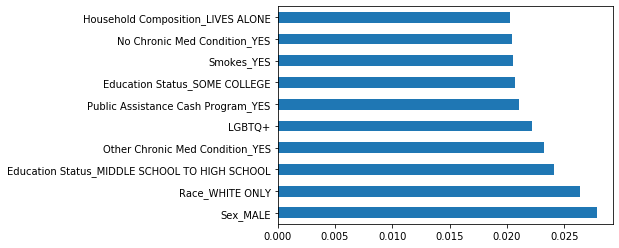

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(data_OHE_X, data_OHE_Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data_OHE_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

This features showed very different attributes from the univariate model above. Here we saw that education status, race, sex, public assistance cash programs, smoking, and LGBTQ+ status may be important in predicting Serious Mental Illness. 

## Some Interesting Statistics

In [33]:
mental_illness = data_OHE[data_OHE['Serious Mental Illness_YES'] == 1]

In [34]:
len(mental_illness[mental_illness['Smokes_YES'] == 1]) /len(mental_illness)

0.3670067299231885

### 37 % of the people suffering from Serious Mental Ilness are smokers

In [35]:
len(mental_illness[mental_illness['LGBTQ+'] == 1]) /len(mental_illness)

0.10922451309124634

### 11% of all the people people suffering from Serious Mental Ilness belong to LGBTQ+ community

In [36]:
len(mental_illness[mental_illness['Household Composition_LIVES ALONE'] == 1]) /len(mental_illness)

0.2466290932439181

### 25% of the people suffering from Serious Mental Ilness live alone

## Oversampling/Undersampling

Our dataset was rather imbalanced; approximately 4 out of 5 people have been diagnosed with a serious mental illness. To avoid having all observations classified positively for Serious Mental Illness, we are going to take some steps to see if correcting this imbalance is necessary in building our model.

We first separated our data into test/train sets to avoid the model overfitting to duplicated data points.

In [37]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_OHE_X, data_OHE_Y, test_size=0.25, random_state=27)

## Random Forest

### Random Forest with Base Data

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)


### measures() function

Here we created a quick function to output measures of model success to evaluate merits of each model quickly.

In [42]:
def measures(actual, pred):
    '''Takes in actual and predicted y values and outputs accuracy, 
    F1 score, recall, and a confusion matrix.'''
    print("Accuracy score is", accuracy_score(actual, pred))
    print("F1 score is", f1_score(actual, pred))
    print("Recall score is", recall_score(actual, pred))
    print("Precision score is", precision_score(actual,pred))
    print("Confusion matrix", '\n', confusion_matrix(actual, pred))
    

measures(y_test, rfc_pred)

Accuracy score is 0.8678992721492512
F1 score is 0.9279686145705032
Recall score is 0.9645329540066382
Precision score is 0.8940752461322081
Confusion matrix 
 [[  203  1205]
 [  374 10171]]


This seems like a pretty good classifier to start! We have decent F1 scores, precision, and recall scores. However, because the dataset is unbalanced it would be interesting to see if we get a model later on that has a lower incidence of false positives.

### Random Forest with Oversampled

In [43]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_over, y_over = ros.fit_resample(X_train, y_train)


In [80]:
rfc_over = RandomForestClassifier(n_estimators=10).fit(X_over, y_over)

# predict on test set
rfc_pred_over = rfc_over.predict(X_test)

measures(y_test, rfc_pred_over)

Accuracy score is 0.8392035472266377
F1 score is 0.9096634705771761
Recall score is 0.9176861071597914
Precision score is 0.901779890038207
Confusion matrix 
 [[ 354 1054]
 [ 868 9677]]


The Random Forest Classifier also performed fairly well with the RandomlyOverSampled dataset. However, the original dataset does score slightly better on all measures except for precision. 

### Random Forest with SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_smote, y_smote = smt.fit_sample(X_train, y_train)


In [81]:
rfc_smote = RandomForestClassifier(n_estimators=10).fit(X_smote, y_smote)

# predict on test set
rfc_pred_smote = rfc_smote.predict(X_test)

measures(y_test, rfc_pred_smote)

Accuracy score is 0.7894252488914917
F1 score is 0.8762354329547131
Recall score is 0.844950213371266
Precision score is 0.9099264705882353
Confusion matrix 
 [[ 526  882]
 [1635 8910]]


While SMOTE RFC doesn't do terribly, these metrics are somewhat disappointing in comparison to the original and oversampled datasets.

### Random Forest and Undersampling

Here we tried a few algorithms for undersampling, including RandomUnderSampler and NearMiss-3 (1 and 2 were also attempted, but had pretty abysmal results for all measures). 

In [47]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, 
                         replacement = True)

X_under, y_under = rus.fit_resample(X_train, y_train)


In [48]:
rfc_under = RandomForestClassifier(n_estimators=10).fit(X_under, y_under)

# predict on test set
rfc_pred_under = rfc_under.predict(X_test)

measures(y_test, rfc_pred_under)

Accuracy score is 0.5949134108591986
F1 score is 0.7147065755361773
Recall score is 0.575154101469891
Precision score is 0.9436751205850319
Confusion matrix 
 [[1046  362]
 [4480 6065]]


This is definitely a step down in terms of model quality from using the original dataset and oversampling. Perhaps a different  undersampling algorithm would yield better results?

### NearMiss

In [49]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=3)    # also tried versions 1 and 2, but these had worse results
X_undernm, y_undernm = nm1.fit_resample(X_train, y_train)

In [50]:
rfc_undernm = RandomForestClassifier(n_estimators=10).fit(X_undernm, y_undernm)

# predict on test set
rfc_pred_under_nm = rfc_undernm.predict(X_test)

measures(y_test, rfc_pred_under_nm)

Accuracy score is 0.5440475194511838
F1 score is 0.6710129180248703
Recall score is 0.5270744428639166
Precision score is 0.9231024746719814
Confusion matrix 
 [[ 945  463]
 [4987 5558]]


NearMiss performed worse than the standard RandomUnderSampling model (although not by much). In the interest of computational time, we're going to proceed just trying models with RandomUnderSampling, RandomOverSampling, SMOTE, and the original dataset. Thus far, it seems that Random Forest Classifier models with the regular and oversampled datasets are the ones to beat.

## K-Nearest Neighbor

### K-Nearest Neighbor Base

In [51]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train, y_train)
knn_test = neigh.predict(X_test)

measures(y_test, knn_test)

Accuracy score is 0.8533422571739312
F1 score is 0.9188688850835378
Recall score is 0.9413940256045519
Precision score is 0.8973964924968361
Confusion matrix 
 [[ 273 1135]
 [ 618 9927]]


K-Nearest Neighbors performs fairly well overall with the original dataset, although the Random Forest Classifier has a better recall and F1 score with the original dataset.

### K-Nearest Neighbor Oversampling

In [53]:
neigh_over = KNeighborsClassifier(n_neighbors=3)
neigh_over = neigh_over.fit(X_over, y_over)
knn_over = neigh_over.predict(X_test)

measures(y_test, knn_over)

Accuracy score is 0.7816447753701999
F1 score is 0.8711874444773468
Recall score is 0.8369843527738264
Precision score is 0.9083050324174128
Confusion matrix 
 [[ 517  891]
 [1719 8826]]


The oversampled KNN model performs slightly worse than the original dataset, with accuracy, F1, recall, and precision all slightly smaller.

### K-Nearest Neighbor SMOTE

In [54]:
neigh_smote = KNeighborsClassifier(n_neighbors=3)
neigh_smote = neigh_smote.fit(X_smote, y_smote)
knn_smote = neigh_smote.predict(X_test)

measures(y_test, knn_smote)

Accuracy score is 0.6942190245126746
F1 score is 0.805657467964056
Recall score is 0.7184447605500237
Precision score is 0.9169692568385379
Confusion matrix 
 [[ 722  686]
 [2969 7576]]


While SMOTE has a slightly better precision score than the oversampled K-NN model, overall it is less accurate and has fewer True Negatives and True Positives than the oversampled.

### K-Nearest Neighbor Undersampling

In [55]:
neigh_under= KNeighborsClassifier(n_neighbors=3)
neigh_under = neigh_under.fit(X_under, y_under)
knn_under = neigh_under.predict(X_test)

measures(y_test, knn_under)

Accuracy score is 0.4990378984355392
F1 score is 0.6186958736627611
Recall score is 0.460692271218587
Precision score is 0.9416553595658074
Confusion matrix 
 [[1107  301]
 [5687 4858]]


Similar to Random Forest Classifiers, undersampling performed the worst of the four sampled datasets with K-NN. Although precision is fairly high, this has been because the False Positive rate was driven very low at the expensive of accuracy. Overall, K-NN has been somewhat disappointing compared to the Random Forest Classifiers. 

## Support Vector Machines

### Support Vector Machines Base

In [56]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc_final = svc.predict(X_test)

measures(y_test, svc_final)

Accuracy score is 0.8822053041077553
F1 score is 0.9374166592586007
Recall score is 1.0
Precision score is 0.8822053041077553
Confusion matrix 
 [[    0  1408]
 [    0 10545]]


So the Support Vector Machines algorithm does interesting things with the original dataset. While accuracy, F1, and precision are reasonably high, this is because SVM has just classified every person in the test dataset as having a Serious Mental Illness. This likely occurred because the dataset is imbalanced; this seems to suggest we should not be looking at recall score as a metric for choosing a model as maximizing recall will simply select a model that classifies everyone as 'positive.' Making sure recall isn't too high (above .99 or .98) will likely be important as it could be symptomatic of this phenomenon. It will be interesting to see if the resample datasets behave differently under SVM.

### Support Vector Machines Oversampling

In [57]:
svc_over = SVC(gamma='auto')
svc_over.fit(X_over, y_over)
svc_over_final = svc_over.predict(X_test)

measures(y_test, svc_over_final)

Accuracy score is 0.6590814021584539
F1 score is 0.7697089573325797
Recall score is 0.6458036984352774
Precision score is 0.9524475524475524
Confusion matrix 
 [[1068  340]
 [3735 6810]]


Interestingly, the oversampled SVM seems to have the opposite issue from SVM with the original dataset. We get a very good metric for true negatives, but at the expense of overall accuracy and capturing true positives.

### Support Vector Machines SMOTE

In [58]:
svc_smote = SVC(gamma='auto')
svc_smote.fit(X_smote, y_smote)
svc_smote_final = svc_smote.predict(X_test)

measures(y_test, svc_smote_final)

Accuracy score is 0.7834853174935162
F1 score is 0.8719065531577904
Recall score is 0.8352773826458036
Precision score is 0.9118956413707423
Confusion matrix 
 [[ 557  851]
 [1737 8808]]


SVM SMOTE performs better than SVM oversampled in terms of accuracy, F1 score, and recall score. It has avoided some of the over-precision of SVM oversampled, and is better than SVM with the original dataset. In short, it seems to have found a balance between true positives and true negatives (although the random forest and K-NN models perform better).

### Support Vector Machines Undersampling

In [59]:
svc_under = SVC(gamma='auto')
svc_under.fit(X_under, y_under)
svc_under_final = svc_under.predict(X_test)

measures(y_test, svc_under_final)

Accuracy score is 0.6404249979084748
F1 score is 0.7539782484258729
Recall score is 0.624561403508772
Precision score is 0.9510469314079423
Confusion matrix 
 [[1069  339]
 [3959 6586]]


Undersampling seems to have similar problems to oversampling with an overemphasis on reducing false positives. Overall, SVM SMOTE performed the best of this family of models, but this has not improved upon the Random Forest Classifier.

## Logistic Regression

### Logistic Regression Base

In [60]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0, solver = 'liblinear').fit(X_train, y_train)
log_final = log.predict(X_test)
log.predict_proba(X_test)

measures(y_test, log_final)

Accuracy score is 0.8822053041077553
F1 score is 0.9373051919137948
Recall score is 0.9981033665244191
Precision score is 0.8834886258708974
Confusion matrix 
 [[   20  1388]
 [   20 10525]]


Logistic regression does slightly better than SVM with the original dataset, but not by much. This model overemphasizes true positives and neglects true negative metrics; the recall is too high to be considered as one of the best models.

### Logistic Regression Oversampling

In [61]:
log_over = LogisticRegression(random_state=0).fit(X_over, y_over)
log_over.predict_proba(X_test)
log_over = log_over.predict(X_test)

measures(y_test, log_over)


Accuracy score is 0.6714632309880365
F1 score is 0.781042654028436
Recall score is 0.6642010431484116
Precision score is 0.9477672530446549
Confusion matrix 
 [[1022  386]
 [3541 7004]]


Logistic regression oversampled is a slightly more balanced model, but is performing much worse than our best models.

### Logistic Regression SMOTE

In [62]:
log_smote = LogisticRegression(random_state=0).fit(X_smote, y_smote)
log_smote.predict_proba(X_test)
log_smote = log_smote.predict(X_test)

measures(y_test, log_smote)


Accuracy score is 0.7876683677737807
F1 score is 0.875073833431778
Recall score is 0.8429587482219061
Precision score is 0.9097328830211852
Confusion matrix 
 [[ 526  882]
 [1656 8889]]


SMOTE logistic regression is the most balanced of the subset of logistic regression models, but ultimately cannot compare with the metrics of the previous frontrunners from the Random Forest Classifier.

### Logistic Regression Undersampling

In [63]:
log_under = LogisticRegression(random_state=0).fit(X_under, y_under)
log_idk = log_under.predict(X_test)

measures(y_test, log_idk)

Accuracy score is 0.6646030285284029
F1 score is 0.7753684092564578
Recall score is 0.656140350877193
Precision score is 0.9475486168173103
Confusion matrix 
 [[1025  383]
 [3626 6919]]


Logistic regression undersampling does poorly on all pertinent fronts. None of these iterations seems useful in considering the best model for this classification problem.

## XGBoost

### XGBoost Base

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1,learning_rate=0.01)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

measures(y_test, xgb_pred)

Accuracy score is 0.8822053041077553
F1 score is 0.9374166592586007
Recall score is 1.0
Precision score is 0.8822053041077553
Confusion matrix 
 [[    0  1408]
 [    0 10545]]


XGBoost performs similarly to logistic regression and SVM with the base dataset and oversimplifies the classification problem.

### XGBoost Oversampling

In [66]:
xgb_over = XGBClassifier(random_state=1,learning_rate=0.01)
xgb_over.fit(X_over, y_over)

xgb_pred_over = xgb_over.predict(X_test)

measures(y_test, xgb_pred_over)

Accuracy score is 0.6490420814858194
F1 score is 0.7637551388184941
Recall score is 0.6430535798956851
Precision score is 0.9402384914032169
Confusion matrix 
 [[ 977  431]
 [3764 6781]]


XGBoost oversampling fares somewhat better, but its metrics are still fairly weak.

### XGBoost SMOTE

In [67]:
xgb_smote = XGBClassifier(random_state=1,learning_rate=0.01)
xgb_smote.fit(X_smote, y_smote)

xgb_pred_smote = xgb_smote.predict(X_test)

measures(y_test, xgb_pred_smote)

Accuracy score is 0.6538107588053208
F1 score is 0.7679973088136354
Recall score is 0.6495021337126601
Precision score is 0.9393773144973254
Confusion matrix 
 [[ 966  442]
 [3696 6849]]


Again, XGBoost does slightly better than the original dataset with XGBoost, but is overall still quite weak.

### XGBoost Undersampling

In [68]:
xgb_under = XGBClassifier(random_state=1,learning_rate=0.01)
xgb_under.fit(X_under, y_under)

xgb_pred_under = xgb_under.predict(X_test)

measures(y_test, xgb_pred_under)

Accuracy score is 0.6455283192503974
F1 score is 0.760662034683387
Recall score is 0.6385016595542912
Precision score is 0.9406258731489243
Confusion matrix 
 [[ 983  425]
 [3812 6733]]


XGBoost fares no better with undersampling. This is another not-so-helpful algorithm in predicting Serious Mental Illness.

## Linear Discriminant Analysis

### LDA Base Data

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_base = lda.predict(X_test)

measures(y_test, lda_base)

Accuracy score is 0.8806994060068603
F1 score is 0.9362025769506085
Recall score is 0.9922238027501186
Precision score is 0.8861692216481748
Confusion matrix 
 [[   64  1344]
 [   82 10463]]


Similar to the SVM and Logistic Regression Base Models, the LDA generates too many True positives and hence the recall score is high. But this happens at the tradeoff of low true negatives. Hence, this is not an ideal model in our scenario.

### LDA Oversampled 

In [70]:
lda_over = LinearDiscriminantAnalysis()
lda_over.fit(X_over, y_over)
lda_over = lda_over.predict(X_test)

measures(y_test, lda_over)

Accuracy score is 0.6667782146741403
F1 score is 0.7768502437111323
Recall score is 0.6574679943100996
Precision score is 0.9492059145673604
Confusion matrix 
 [[1037  371]
 [3612 6933]]


The Oversampled LDA model has worse performance than the baseline model. The true positives have decreased significantly and seem to have shifted more towards false negatives. 

### LDA Undersampled

In [71]:
lda_under = LinearDiscriminantAnalysis()
lda_under.fit(X_under, y_under)
lda_under = lda_under.predict(X_test)

measures(y_test, lda_under)

Accuracy score is 0.6594997071864804
F1 score is 0.7708075233697489
Recall score is 0.6490279753437648
Precision score is 0.9488423679467628
Confusion matrix 
 [[1039  369]
 [3701 6844]]


The Undersampled LDA is equally bad like the Oversampled LDA. The precision score is high, but there are low scores on all other metrics.

### LDA Smote

In [72]:
lda_smote = LinearDiscriminantAnalysis()
lda_smote.fit(X_smote, y_smote)
lda_smote = lda_smote.predict(X_test)

measures(y_test, lda_smote)

Accuracy score is 0.782230402409437
F1 score is 0.8712597062169246
Recall score is 0.8352773826458036
Precision score is 0.9104817035352492
Confusion matrix 
 [[ 542  866]
 [1737 8808]]


We tried LDA with SMOTE and it has better metrics than the Oversampled LDA, but definitely not good enough to overtake the RFC models as the accuracy of the model is well below 80%

## Naive Bayes

### Naive Bayes with Base Data

In [73]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_base = nb.predict(X_test)

measures(y_test, nb_base)

Accuracy score is 0.5978415460553835
F1 score is 0.7185761957730813
Recall score is 0.581981981981982
Precision score is 0.938953488372093
Confusion matrix 
 [[1009  399]
 [4408 6137]]


We ran the Naive Bayes model with the original dataset and it performs abysmally in terms of reducing false negatives; this is evident from the low recall score of around 58%.

### Naive Bayes with Oversampled Data

In [74]:
nb_over = GaussianNB()
nb_over.fit(X_over, y_over)
nb_over = nb_over.predict(X_test)

measures(y_test, nb_over)

Accuracy score is 0.5374383000083661
F1 score is 0.6588511137162955
Recall score is 0.5063063063063064
Precision score is 0.9429530201342282
Confusion matrix 
 [[1085  323]
 [5206 5339]]


There is further worsening in the metrics like Accuracy, F1 score and the recall even comparing to the baseline model which was already performing bad. It's fairly clear our dataset is not a good fit for Naive Bayes, but we wanted to see how the other datasets performed regardless

### Naive Bayes with Undersampled Data

In [75]:
nb_under = GaussianNB()
nb_under.fit(X_under, y_under)
nb_under = nb_under.predict(X_test)

measures(y_test, nb_under)

Accuracy score is 0.5589391784489249
F1 score is 0.6800970873786408
Recall score is 0.5314366998577524
Precision score is 0.944229149115417
Confusion matrix 
 [[1077  331]
 [4941 5604]]


Similar to the previous models, even this one with undersampled data performs badly.

### Naive Bayes with SMOTE

In [76]:
nb_smote = GaussianNB()
nb_smote.fit(X_smote, y_smote)
nb_smote = nb_smote.predict(X_test)

measures(y_test, nb_smote)

Accuracy score is 0.5421233163222622
F1 score is 0.6731171235740311
Recall score is 0.5343764817449028
Precision score is 0.909164246531139
Confusion matrix 
 [[ 845  563]
 [4910 5635]]


Even with SMOTE, there is no improvement in the Naive Bayes Model.




After trying out Oversampling, SMOTE, and Undersampling methods with different models, we understand that the performance often decreases with these methods than the base models and that is because we increase the number of instances of records without serious mental illness and the models don't play well with it.

Only Random Forest gives good output with Oversampling and the base data. Hence we will choose Random Forest to go ahead and try both the base dataset as well as the oversampled dataset.

For both of these models we will perform Hyperparameter tuning on this Random Forest model with Oversampled and Original data by doing GridSearch.

In [77]:
from sklearn.model_selection import GridSearchCV

## Hyperparameter tuning for the original baseline dataset

We tried different combinations of parameters in the GridSearch and finally kept the one which performed better

In [82]:
model_params = {
    'n_estimators': [10, 20, 30],
    'max_features': ['sqrt', 'log2', 0.2, 0.15],
    'min_samples_split': [2, 4, 6]
}

# model_params = {
#     'n_estimators': [10, 20, 30],
#     'max_features': ['sqrt', 0.2, 0.3],
#     'min_samples_split': [2, 4, 6]
# }

# model_params = {
#     'n_estimators': [10, 25, 35],
#     'max_features': ['log2', 0.25, 0.3],
#     'min_samples_split': [2, 4, 6]
# }

In [83]:
# create random forest classifier model
rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the random search meta-estimator to find the best model
best_model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(best_model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [84]:
clf.best_params_

{'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 30}

In [85]:
# generate predictions using the best-performing model
y_pred_best = best_model.predict(X_test)

measures(y_test, y_pred_best)

Accuracy score is 0.8806994060068603
F1 score is 0.9362880886426592
Recall score is 0.9936462778568041
Precision score is 0.8851905043507645
Confusion matrix 
 [[   49  1359]
 [   67 10478]]


The model looks good at first, but again it can be noticed that it has the same problem of being unable to classify true negatives well. Its very high recall score and high number of fall positives suggest that it is inclined towards classifying everything as a postive class or rather everyone having serious mental illness, which is not what we want. 

Below the confusion matrix has been visualized.

[[   49  1359]
 [   67 10478]]


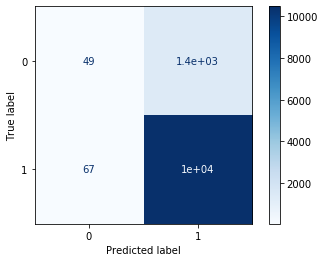

In [86]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(best_model, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)

Below the feature importances are shown for the Hyperparameter tuned Random Forest model with original data.

[0.0175813  0.01773012 0.01172028 0.00613169 0.01541394 0.01163935
 0.01092026 0.02351077 0.00543132 0.01431123 0.01992404 0.01442195
 0.01646893 0.00266168 0.00077121 0.0097608  0.00218842 0.00743508
 0.00750297 0.0018629  0.01737543 0.00935077 0.00720939 0.01246627
 0.01144875 0.00312796 0.017869   0.00096867 0.0048621  0.00526195
 0.01442627 0.00994463 0.00882729 0.00417315 0.0060011  0.01275751
 0.01470658 0.00920675 0.01135055 0.01142328 0.01384027 0.00964129
 0.01326993 0.00409477 0.00377992 0.00850403 0.0116174  0.00109042
 0.00340749 0.00488793 0.00743035 0.00440823 0.00420991 0.01255498
 0.00615578 0.01699342 0.01587636 0.01786295 0.00583812 0.01337819
 0.02678415 0.01482021 0.0009132  0.0012082  0.01795673 0.01340259
 0.00776693 0.00776353 0.01667425 0.01597183 0.01010426 0.01493533
 0.00392336 0.00972577 0.01379109 0.00176108 0.00537308 0.01093097
 0.00742718 0.00327125 0.00433752 0.00245794 0.00713821 0.00267686
 0.00353104 0.01527833 0.00957285 0.00606857 0.00411642 0.0045

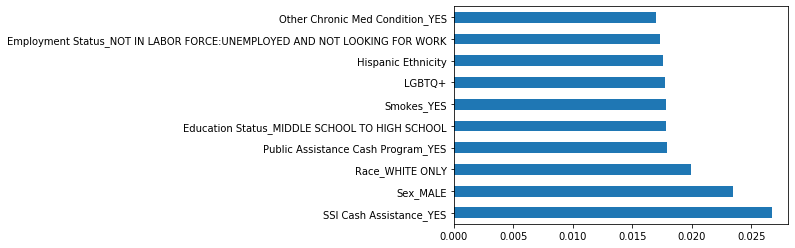

In [87]:

print(best_model.best_estimator_.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(best_model.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Determining which features are the most effective predictors of outcome in the final model shows that features like SSI Cash Assistance, Smoking, Male Sex, White Race etc are the most important predictors.


## Hyperparameter tuning for the Oversampled dataset

Here we perform the same hyperparamter tuning operation for the RandomOverSampling dataset.

In [88]:
model_params_over = {
    'n_estimators': [10, 20, 30],
    'max_features': ['sqrt', 'log2', 0.2, 0.15],
    'min_samples_split': [2, 4, 6]
}

# model_params = {
#     'n_estimators': [10, 20, 30],
#     'max_features': ['sqrt', 0.2, 0.3],
#     'min_samples_split': [2, 4, 6]
# }

# model_params = {
#     'n_estimators': [10, 25, 35],
#     'max_features': ['log2', 0.25, 0.3],
#     'min_samples_split': [2, 4, 6]
# }

In [89]:
# create random forest classifier model
rf_model_over = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf_over = GridSearchCV(rf_model_over, model_params_over, cv=5)

# train the random search meta-estimator to find the best model
best_model_over = clf_over.fit(X_over, y_over)

# print winning set of hyperparameters
from pprint import pprint
pprint(best_model_over.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [90]:
clf_over.best_params_

{'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 30}

In [91]:
# generate predictions using the best-performing model
y_pred_best = best_model_over.predict(X_test)

measures(y_test, y_pred_best)

Accuracy score is 0.8596168325943278
F1 score is 0.9227866740290815
Recall score is 0.9508771929824561
Precision score is 0.8963082148922857
Confusion matrix 
 [[  248  1160]
 [  518 10027]]


Here it can be seen that the Accuracy score has decreased to some extent, but the model has identified true negatives better than the previous model. These improvements were made while maintaining a pretty good F1 score, though it is is slightly less than the original dataset model. The hardest part in this project was selecting a model with good metrics that did not classify everything as True Postives (or classifying everyone seeking mental health services has a serious mental illness). This would cause wastage of resources on the part of doctors, as people without a serious mental illness may be overtreated. While some level of false positives are acceptable in getting more people help, we are concerned about the [shortage](https://www.bhecon.org/wp-content/uploads/2018/01/NY-Chartbook-2018_FINAL.pdf) of mental health care professionals in some areas.

This improvement in the Precision score of 89.63% from the 88.51% of previous model is more relevant in this case than the slight decrease in the recall and accuracy as it might lead to some people having serious mental illness being missed out, but at the same time reducing the false positves and saving the energy and resources of doctors to keep their productivty optimum. Hence, we are selecting the RandomlyOverSampled Random Forest Classifier with the above hyperparameters as the final model.

Below the confusion matrix has been visualized.

[[  248  1160]
 [  518 10027]]


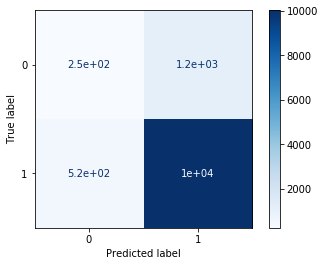

In [92]:
disp = plot_confusion_matrix(best_model_over, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)

Below the feature importances are shown for the Hyperparameter tuned Random Forest model with Oversampled data.

[0.0175813  0.01773012 0.01172028 0.00613169 0.01541394 0.01163935
 0.01092026 0.02351077 0.00543132 0.01431123 0.01992404 0.01442195
 0.01646893 0.00266168 0.00077121 0.0097608  0.00218842 0.00743508
 0.00750297 0.0018629  0.01737543 0.00935077 0.00720939 0.01246627
 0.01144875 0.00312796 0.017869   0.00096867 0.0048621  0.00526195
 0.01442627 0.00994463 0.00882729 0.00417315 0.0060011  0.01275751
 0.01470658 0.00920675 0.01135055 0.01142328 0.01384027 0.00964129
 0.01326993 0.00409477 0.00377992 0.00850403 0.0116174  0.00109042
 0.00340749 0.00488793 0.00743035 0.00440823 0.00420991 0.01255498
 0.00615578 0.01699342 0.01587636 0.01786295 0.00583812 0.01337819
 0.02678415 0.01482021 0.0009132  0.0012082  0.01795673 0.01340259
 0.00776693 0.00776353 0.01667425 0.01597183 0.01010426 0.01493533
 0.00392336 0.00972577 0.01379109 0.00176108 0.00537308 0.01093097
 0.00742718 0.00327125 0.00433752 0.00245794 0.00713821 0.00267686
 0.00353104 0.01527833 0.00957285 0.00606857 0.00411642 0.0045

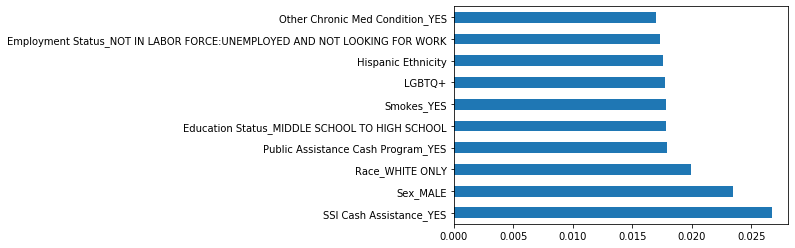

In [93]:
print(best_model.best_estimator_.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(best_model.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Similar features like SSI Cash Assistance, Smoking, Male Sex, White Race etc have come up as the most important predictors in this model as the previous model with original data.

## Creating value through Machine Learning


This could be a promising step in implementing machine learning to help predict serious mental illnesses. It should encourage healthcare practitioners to further investigate implementating such technologies to tackle gradually worsening mental health issues. As our models were trained on people who sought out care through the Office of Mental Health, we acknowledge that our work will best be used in providing people who seek help a swifter diagnosis.

We embarked on this project hoping to find people living with untreated serious mental illness living in New York State, but we quickly realized the limitations of our ambitions. Because this dataset is just of people who are receiving mental health services in New York State, we could only apply this model to people currently within the mental health system. So while we do think that our model could help pinpoint people particularly at risk of having a serious mental illness, we do not think this tool is appropriate to apply to the general population.

While we learned a lot from this project, we’re trying to be realistic about how much value we are adding to this space. We do think its possible our model could be used to recognize Serious Mental Illness sooner for people who get mental health services. If the data is available, a future project may be able to do that with electronic health records to create a similar model that could be used for the general population. Because ultimately we think the most important work is still to come by identifying people who need help, but haven’t been able to ask for it yet.
